# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [1]:
SEARCH_TERMS = ['inchianti', 'study']

## Publication Analysis

In [2]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

2019-07-19 15:48:00,115 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-07-19 15:48:00,119 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
analyzer = KeyPaperAnalyzer()
log = analyzer.launch(*SEARCH_TERMS)

2019-07-19 15:48:00,129 INFO: TODO: handle queries which return more than 10000 items
2019-07-19 15:48:01,026 INFO: Found 246 articles about ('inchianti', 'study')
2019-07-19 15:48:01,027 INFO: Loading publication data
2019-07-19 15:48:01,027 INFO: Creating pmids table for request with index.
2019-07-19 15:48:01,062 INFO: Found 246 publications in the local database

2019-07-19 15:48:01,063 INFO: Started loading citation stats
2019-07-19 15:48:01,092 INFO: Done loading citation stats
2019-07-19 15:48:01,103 INFO: Loaded citation stats for 221 of 246 articles.
Others may either have zero citations or be absent in the local database.
2019-07-19 15:48:01,103 INFO: Filtering top 100000 or 80% of all the citations
2019-07-19 15:48:01,107 INFO: 246 articles to process.

2019-07-19 15:48:01,107 INFO: Calculating co-citations for selected articles
2019-07-19 15:48:01,120 INFO: Loaded 694 lines of citing info
2019-07-19 15:48:01,120 INFO: Found 2185 co-cited pairs of articles
2019-07-19 15:48:0

2019-07-19 15:48:03,933 INFO: 5: klotho:0.294,hypovitaminosis:0.009,nmolliter:0.009,suppressor:0.009,plexus:0.009,logarithm:0.009,fracture:0.005,p0007:0.005,vit-d:0.005,random-effects:0.005,relative:0.005,overexpression:0.005,adults65years:0.005,threshold681pgml:0.005,error035:0.005,p00009:0.005,klotho681pgml:0.005,-014:0.005,-010:0.005,mellitus:0.005,tobacco:0.005,zero:0.005,deficient:0.014,transmembrane:0.014,pressure:0.014,nmoll:0.009,span:0.009,average:0.009,robustness:0.009,season:0.005,sociodemographics:0.005,causal:0.005,knowledge:0.005,possibility:0.005,parathyroid:0.005,disruption:0.005,atrophy:0.005,p00004:0.005,skill:0.005,weight:0.005,prefrailty:0.005,future:0.005,pgml:0.045,enrollment:0.018,ngml:0.014,log:0.014,trail:0.014,p002:0.009,mouse:0.009,calcium:0.009,homeostasis:0.009,brain:0.009,exhaustion:0.009,weakness:0.009,multiply:0.005,studies-depression:0.005,interview:0.005,comparison:0.005,glucose:0.005,standard:0.005,motor:0.005,cvd:0.023,visit:0.023,all-cause:0.020,dev

In [4]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
# show(plotter.chord_diagram_components())

In [6]:
show(plotter.component_size_summary())

2019-07-19 15:48:04,037 INFO: Summary component detailed info visualization


In [7]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-07-19 15:48:04,211 INFO: Per component detailed info visualization
/home/Nikolay.Kapralov/pubtrends/models/keypaper/visualization.py:407: RuntimeWarning: divide by zero encountered in log
  size_scaling_coefficient = max_radius_screen_units / np.log(df['total']).max()
/home/Nikolay.Kapralov/pubtrends/models/keypaper/visualization.py:414: RuntimeWarning: divide by zero encountered in log
  size=np.log(df['total']) * size_scaling_coefficient))


## Top Cited Papers Overall

In [8]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [9]:
show(plotter.max_gain_papers())

2019-07-19 15:48:05,101 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [10]:
show(plotter.max_relative_gain_papers())

2019-07-19 15:48:05,165 INFO: Top papers in relative gain for each year
2019-07-19 15:48:05,165 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-07-19 15:48:05,166 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [11]:
plotter.article_citation_dynamics()

2019-07-19 15:48:05,228 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


In [12]:
analyzer.df

pmid                                              title  \
0    11129752  Subsystems contributing to the decline in abil...   
1    12512227  Changes in anthropometric measures in men and ...   
2    12890067  Mild cognitive deterioration with subcortical ...   
3    12890453  Serum IL-1beta levels in health and disease: a...   
4    12902531  A comparison of leg power and leg strength wit...   
5    12949379           Age and disability affect dietary intake   
6    14599704  Dietary intake estimated using different metho...   
7    14749236  Antioxidants and physical performance in elder...   
8    14962156  Impairments of muscles and nerves associated w...   
9    15031308  Inflammatory markers and physical performance ...   
10   15031309  Hemoglobin levels and skeletal muscle: results...   
11   15086651  Anemia is associated with disability and decre...   
12   15123757  Effect of DHEAS on skeletal muscle over the li...   
13   15178496  Neurological examination findings to predict l...   
14   15455197  Bone density and hemoglobin levels in older pe...   
15   15575129  Screening for poor performance of lower extrem...   
16   15743282  Executive function correlates with walking spe...   
17   15748776  Vitamin E levels, cognitive impairment and dem...   
18   15983180  Association between physical activity, physica...   
19   16086930  Patterns of inflammation associated with perip...   
20   16112120  Association between nutrient intake and periph...   
21   16112778  Markers of inflammation, vitamin E and periphe...   
22   16183958  Anemia is associated with depression in older ...   
23   16246987  Renal function, erythropoietin, and anemia of ...   
24   16271918  Proinflammatory state and circulating erythrop...   
25   16339327  25(OH)D Serum levels decline with age earlier ...   
26   16456198  Low socioeconomic status and disability in old...   
27   16567378  Lower plasma vitamin E levels are associated w...   
28   16648752  Epidemiology of back pain in a representative ...   
29   16679098  Relation of angiotensin-converting enzyme inhi...   
..        ...                                                ...   
159  25011077  Inflamm-aging does not simply reflect increase...   
160  25086618  Relationship between vitamin D and inflammator...   
161  25104822  Aging and the burden of multimorbidity: associ...   
162  25311648  Whole blood gene expression and interleukin-6 ...   
163  25542415  Creatinine clearance, walking speed, and muscl...   
164  25693419  FRAT-up, a Web-based fall-risk assessment tool...   
165  25737263  Frailty as a predictor of the incidence and co...   
166  25748030  Physiological factors contributing to mobility...   
167  25748032  Serum 25-Hydroxyvitamin D, Plasma Klotho, and ...   
168  25761112  Detection of a novel, integrative aging proces...   
169  25838546  The Relationship Between Urinary Total Polyphe...   
170  25919574  Low Levels of a Urinary Biomarker of Dietary P...   
171  26087330  Gene expression markers of age-related inflamm...   
172  26214107  INSULIN-LIKE GROWTH FACTOR-1 AND ANEMIA IN OLD...   
173  26273019  Are Performance Measures Necessary to Predict ...   
174  26290538  Association of Physical Activity History With ...   
175  26297657  Plasma Klotho and Cognitive Decline in Older A...   
176  26333772  The Predictive Value of the EWGSOP Definition ...   
177  26355017  Change in Epigenome-Wide DNA Methylation Over ...   
178  26490492  Association of habitual dietary resveratrol ex...   
179  26716861  Fall Risk Assessment Tools for Elderly Living ...   
180  27036884  Overall Cardiovascular Health Is Associated Wi...   
181  27080555  The association between dietary patterns deriv...   
182  27102783  Association between Both Total Baseline Urinar...   
183  27363602  Changes in the expression of splicing factor t...   
184  27594522  Predictive Performance of a Fall Risk Assessme...   
185  28329134  Dynapenic Abdominal Obesity as a Predictor of ... 

## Component Evolution

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
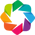

In [13]:
import math
import holoviews as hv
hv.extension('bokeh')

import pandas as pd

In [14]:
# Tuning parameters

MIN_PAPERS = 0   # Stop analysis if total number of papers is less than MIN_PAPERS
MIN_CHANGE_VALUE = 0   # Do not display links between clusters that contain less than MIN_CHANGE_VALUE

In [15]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = WordNetLemmatizer()

def tokenize(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(re.sub('[^a-zA-Z0-9\- ]*', '', text.lower()))
    stop_words = set(stopwords.words('english'))
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos) and word not in stop_words]
    
    return list(filter(lambda t: len(t) >= 3, [lemmatizer.lemmatize(n) for n in nouns]))

In [16]:
import numpy as np
import re

def get_tfidf_words(df, comps, size=5):
    corpus = []

    for i, comp in comps.items():
        comp_corpus = ''
        for pmid in comp:
            sel = df[df['pmid'] == pmid]
            title = sel['title'].astype(str).values[0].lower()
            abstract = sel['abstract'].astype(str).values[0].lower()
            comp_corpus += f'{title} {abstract}'
            
        # Remove search terms from component description
        for term in analyzer.terms:
            comp_corpus = comp_corpus.replace(term.lower(), '')
        corpus.append(comp_corpus)

    vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
    tfidf = vectorizer.fit_transform(corpus)
    
    words = vectorizer.get_feature_names()
    kwd = {}
    for i in comps.keys():
        # It might be faster to use np.argpartition instead of np.argsort
        # Sort indices by tfidf value
        ind = np.argsort(tfidf[i, :].toarray(), axis=1)
        
        # Take size indices with the largest tfidf
        kwd[i] = list(map(lambda idx: words[idx], ind[0, -size:]))
    
    return kwd

In [17]:
from keypaper.utils import get_subtopic_descriptions

CG, components_merged = analyzer.subtopic_evolution_analysis(step=5, min_papers=MIN_PAPERS)
evol = plotter.analyzer.evolution_df.copy()
evol = evol.reset_index().rename(columns={'index': 'pmid'})
evol['pmid'] = evol['pmid'].astype(str)

kwds = {}
for col in evol:
    if isinstance(col, (int, float)):
        evol[col] = evol[col].apply(int)
        comps = dict(evol.groupby(col)['pmid'].apply(list))
        kwds[col] = get_tfidf_words(analyzer.df, comps)

2019-07-19 15:48:05,961 INFO: Studying evolution of subtopic clusters in 2005 - 2019 with step of 5 years
2019-07-19 15:48:05,985 INFO: 2019: graph contains 189 nodes, 1100 edges
2019-07-19 15:48:06,082 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-19 15:48:06,082 INFO: Reassigning components
2019-07-19 15:48:06,083 INFO: Processed 7 components
2019-07-19 15:48:06,103 INFO: 2014: graph contains 141 nodes, 714 edges
2019-07-19 15:48:06,186 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-19 15:48:06,186 INFO: Reassigning components
2019-07-19 15:48:06,186 INFO: Processed 7 components
2019-07-19 15:48:06,205 INFO: 2009: graph contains 60 nodes, 220 edges
2019-07-19 15:48:06,239 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-19 15:48:06,240 INFO: Reassigning components
2019-07-19 15:48:06,240 INFO: Processed 6 components


In [18]:
cols = evol.columns[2:]
pairs = list(zip(cols, cols[1:]))
nodes = set()
edges = []
mapping = {}

for now, then in pairs:
    nodes_now = [f'{now} {c}' for c in evol[now].unique() if c >= 0]
    nodes_then = [f'{then} {c}' for c in evol[then].unique() if c >= 0]
   
    inner = {node : 0 for node in nodes_then}
    changes = {node : inner.copy() for node in nodes_now}
    for pmid, comp in evol.iterrows():
        c_now, c_then = comp[now], comp[then]
        if c_now != -1 and c_then != -1:
            changes[f'{now} {c_now}'][f'{then} {c_then}'] += 1
            
    for v in nodes_now:
        for u in nodes_then:
            if changes[v][u] > MIN_CHANGE_VALUE:
                edges.append((v, u, changes[v][u]))
                nodes.add(v)
                nodes.add(u)

In [19]:
nodes_data = []

for node in nodes:
    year, c = node.split(' ')
    kwd = ', '.join(kwds[int(year)][int(c)])
    nodes_data.append([node, kwd])
        
nodes_ds = hv.Dataset(nodes_data, 'index', 'label')

In [20]:
from holoviews import dim

value_dim = hv.Dimension('Amount', unit=None)
topic_evolution = hv.Sankey((edges, nodes_ds), ['From', 'To'], vdims=value_dim)
topic_evolution.opts(labels='label', width=960, height=400, show_values=False, cmap='Category20',
                     edge_color=dim('To').str(), node_color=dim('color').str())

:Sankey   [From,To]   (Amount)

## PageRank for Citation Analysis

In [21]:
analyzer.search(*SEARCH_TERMS) # Re-launch search to restore eliminated PMIDs
analyzer.load_citations()

2019-07-19 15:48:11,647 INFO: TODO: handle queries which return more than 10000 items
2019-07-19 15:48:12,494 INFO: Found 246 articles about ('inchianti', 'study')
2019-07-19 15:48:12,495 INFO: Started loading raw information about citations
2019-07-19 15:48:12,498 INFO: Done loading citations, building citation graph
2019-07-19 15:48:12,501 INFO: Built citation graph - nodes 208 edges 508


In [22]:
import networkx as nx

# Apply PageRank algorithm with damping factor of 0.5
pr_nx = nx.pagerank(analyzer.G, alpha=0.5, tol=1e-9)

In [23]:
ancestor = dict.fromkeys(analyzer.G, (0, 0))

# Select ancestor with highest PR for each node
for v in analyzer.G:
    for u in analyzer.G[v]:
        anc, pr = ancestor[u]
        if pr_nx[v] > pr:
            ancestor[u] = (v, pr_nx[v])

In [24]:
PRG = nx.DiGraph()
for v, anc in ancestor.items():
    u, pr = anc
    if pr > 0:
        PRG.add_edge(u, v)

In [25]:
start, end = zip(*list(PRG.edges()))

In [26]:
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, HoverTool, MultiLine
from bokeh.models.graphs import NodesAndLinkedEdges

node_indices = list(filter(lambda node: len(analyzer.df[analyzer.df['pmid'] == node]) > 0, list(PRG.nodes())))

years = []
year_counts = {}
titles = []
pageranks = []
size = []
for node in node_indices:
    sel = analyzer.df[analyzer.df['pmid'] == node]
    year = sel['year'].values[0]
    
    if not year in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1
    years.append(year)
    
    titles.append(sel['title'].values[0])
    pageranks.append(pr_nx[node] * 100)
    size.append(pr_nx[node] * 1000)
max_year_count = max(list(year_counts.values()))
min_year, max_year = min(years), max(years)

plot = figure(title="PageRank applied to citation filtering", 
              x_range=(min_year - 1, max_year+1), y_range=(0, max_year_count + 1),
              tools="", toolbar_location=None)

TOOLTIPS = """
    <div style="max-width: 320px">
        <div>
            <span style="font-size: 12px; font-weight: bold;">@title</span>
        </div>
        <div>
            <span style="font-size: 11px;">Year</span>
            <span style="font-size: 10px;">@year</span>
        </div>
        <div>
            <span style="font-size: 11px;">PMID</span>
            <span style="font-size: 10px;">@pmid</span>
        </div>
        <div>
            <span style="font-size: 11px;">PageRank</span>
            <span style="font-size: 10px;">@pagerank</span>
        </div>
    </div>
"""

plot.add_tools(HoverTool(tooltips=TOOLTIPS))

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.data['pmid'] = node_indices
graph.node_renderer.data_source.data['year'] = years
graph.node_renderer.data_source.data['title'] = titles
graph.node_renderer.data_source.data['pagerank'] = pageranks
graph.node_renderer.data_source.data['size'] = size
# graph.edge_renderer.data_source.data = dict(start=start, end=end)

### start of layout code   
x = [analyzer.df[analyzer.df['pmid'] == pmid]['year'].values[0] for pmid in node_indices]
y = []
tmp_year_counts = {}
for node in node_indices:
    year = analyzer.df[analyzer.df['pmid'] == node]['year'].values[0]
    if not year in tmp_year_counts:
        tmp_year_counts[year] = 1
    else:
        tmp_year_counts[year] += 1
    y.append(tmp_year_counts[year])

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

graph.node_renderer.glyph = Circle(size='size', fill_color='blue')
graph.node_renderer.hover_glyph = Circle(size='size', fill_color='green')

# graph.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=1, line_width=1)
# graph.edge_renderer.hover_glyph = MultiLine(line_color='green', line_width=2)

graph.inspection_policy = NodesAndLinkedEdges()

plot.min_border_left = 75
plot.renderers.append(graph)

show(plot)

### Top Papers by PageRank

In [27]:
for pmid, pagerank in sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)[:10]:
    print(f'{(100*pagerank):.2f} {analyzer.df[analyzer.df["pmid"] == pmid]["title"].values[0]}')

17.20 Subsystems contributing to the decline in ability to walk: bridging the gap between epidemiology and geriatric practice in the InCHIANTI study
1.22 Dietary intake estimated using different methods in two Italian older populations
1.19 Effect of DHEAS on skeletal muscle over the life span: the InCHIANTI study
1.04 Inflammatory markers and physical performance in older persons: the InCHIANTI study
0.99 Sarcopenic obesity and inflammation in the InCHIANTI study
0.85 A genome-wide association study identifies protein quantitative trait loci (pQTLs)
0.81 Lower extremity strength and power are associated with 400-meter walk time in older adults: The InCHIANTI study
0.74 25(OH)D Serum levels decline with age earlier in women than in men and less efficiently prevent compensatory hyperparathyroidism in older adults
0.72 Predictivity of survival according to different equations for estimating renal function in community-dwelling elderly subjects
0.68 Antioxidants and physical performance i

### PageRank and citation ranking correlation

In [28]:
from scipy.stats import spearmanr

analyzer.df['citation_rank'] = analyzer.df['total'].rank(method='first', ascending=False)
pagerank_rank = sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)

r = np.zeros((len(pagerank_rank), 2))
for i, (pmid, pr) in enumerate(pagerank_rank):
    sel = analyzer.df[analyzer.df['pmid'] == pmid]
    if len(sel) > 0:
        r[i, 0] = i
        r[i, 1] = int(sel['citation_rank'].values[0])
        
TOP_X = [10, 30, 50, 100]
for x in TOP_X:
    rho, _ = spearmanr(r[:x, 0], r[:x, 1])
    print(f'Spearman correlation coefficient for top {x}: {rho}')

Spearman correlation coefficient for top 10: 0.35757575757575755
Spearman correlation coefficient for top 30: 0.32769744160177977
Spearman correlation coefficient for top 50: 0.3118442220399942
Spearman correlation coefficient for top 100: 0.48519197477558546


# Experimental Features

## Hub nodes

In [29]:
import numpy as np

adj = np.zeros((analyzer.CG.number_of_nodes(), analyzer.df['comp'].nunique()))
w = np.zeros(adj.shape)

for i, v in enumerate(analyzer.CG.nodes()):
    for u in analyzer.CG[v]:
        c = analyzer.df[analyzer.df['pmid'] == u]['comp'].values[0]
        adj[i][c] += 1
        w[i][c] += analyzer.CG[v][u]['weight']

In [30]:
size = 10

hub_indices = np.argsort(np.sum(adj > 0, axis=1))[-size:]

nodes_list = list(analyzer.CG.nodes)
hub_pmids = [nodes_list[idx] for idx in hub_indices]

In [31]:
print('Hub nodes')
print(analyzer.df[analyzer.df['pmid'].isin(hub_pmids)][['pmid', 'title']])

Hub nodes
         pmid                                              title
0    11129752  Subsystems contributing to the decline in abil...
9    15031308  Inflammatory markers and physical performance ...
12   15123757  Effect of DHEAS on skeletal muscle over the li...
18   15983180  Association between physical activity, physica...
40   17095641  Sarcopenic obesity and inflammation in the InC...
62   18426961  Low plasma carotenoids and skeletal muscle str...
76   19181709  Skeletal muscle and mortality results from the...
99   20230273  Anabolic and catabolic biomarkers as predictor...
161  25104822  Aging and the burden of multimorbidity: associ...
171  26087330  Gene expression markers of age-related inflamm...


## Custom PageRank version for testing

This section is devoted to experiments with PageRank on the basis of networkx source code.

In [32]:
# Adopted from networkx source code
# https://networkx.github.io/documentation/networkx-1.10/_modules/networkx/algorithms/link_analysis/pagerank_alg.html#pagerank

import numpy as np
from networkx import NetworkXError

def pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None):
    """Return the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    alpha : float, optional
      Damping parameter for PageRank, default=0.85.

    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key for every graph node and nonzero personalization value for each node.
      By default, a uniform distribution is used.

    max_iter : integer, optional
      Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.

    nstart : dictionary, optional
      Starting value of PageRank iteration for each node.

    weight : key, optional
      Edge data key to use as weight.  If None weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

    Returns
    -------
    pagerank : dictionary
       Dictionary of nodes with PageRank as value

    Examples
    --------
    >>> G = nx.DiGraph(nx.path_graph(4))
    >>> pr = nx.pagerank(G, alpha=0.9)

    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence.  The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.

    The PageRank algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs by converting each edge in the
    directed graph to two edges.

    See Also
    --------
    pagerank_numpy, pagerank_scipy, google_matrix

    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry,
       The PageRank citation ranking: Bringing order to the Web. 1999
       http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf
    """
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
    E = W.number_of_edges()
       
    # Number of references for each node and average for graph
    NR = D.out_degree(list(D.nodes()))
    NR_avg = E * 2 / N

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
    
    # power iteration: make up to max_iter iterations
    n_iter = 0
    for _ in range(max_iter):
        n_iter += 1
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] / (1 + np.sqrt(NR[n]))
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            print(f'PageRank converged in {n_iter} iterations.')
            return x

    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

In [33]:
pr = pagerank(analyzer.G, alpha=0.5, tol=1e-12)

PageRank converged in 26 iterations.
